## Import

In [ ]:
!pip install soynlp
!pip show soynlp

     |████████████████████████████████| 419kB 6.8MB/s 
Name: soynlp
Version: 0.0.493
Summary: Unsupervised Korean Natural Language Processing Toolkits
Home-page: https://github.com/lovit/soynlp
Author: Lovit
Author-email: soy.lovit@gmail.com
License: UNKNOWN
Location: /usr/local/lib/python3.7/dist-packages
Requires: psutil, scikit-learn, scipy, numpy
Required-by: 


In [ ]:
!pip install gensim
!pip show gensim

Name: gensim
Version: 3.6.0
Summary: Python framework for fast Vector Space Modelling
Home-page: http://radimrehurek.com/gensim
Author: Radim Rehurek
Author-email: me@radimrehurek.com
License: LGPLv2.1
Location: /usr/local/lib/python3.7/dist-packages
Requires: scipy, smart-open, numpy, six
Required-by: 


In [ ]:
import pandas as pd
import numpy as np
import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 그래프에서 한글표현을 위해 폰트를 설치합니다.
%config InlineBackend.figure_format = 'retina'

!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/content/drive/MyDrive/DA1차_공포영화크롤링/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

# 기본 글꼴 변경
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='NanumBarunGothic')

#Movie

### 크롤링한 파일 로드

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DA1차_공포영화크롤링/review_csv/happydeathday.csv")
df.shape

(5988, 1)

In [ ]:
display(df.head())
display(df.tail())

,text
0,팝콘만 사고 음료수는 사지 마세요. 여주가 핵사이다
1,이건 완전 새로운 공포영화 ㅋㅋㅋ 무섭고 유쾌하고 혼자 다 하셨다
2,무서울줄알았는데 뭔가 유쾌한 공포?느낌이예요 저는 진짜재밋던데...?
3,남녀가 맨날 보면 정드는거 맞구나
4,이 영화 보기전으로 리셋하고 싶다. 다시 보고 싶네요


,text
5983,반전쩐다ㅋㅋㅋ너무재밌어요 또보고싶음 ㅎㅎ
5984,멍청하고 지루한 영화! 하나도 재미없다
5985,이것은 공포영화가 아니다
5986,몰입도 굿 7점주는이유는뭔가 나는 더 큰 반전을 원했음ㅋㅋ하지만 정말 재미있었음 스...
5987,발랄하고 재미있는 영화.


In [ ]:
sample_index = 24

In [ ]:
sample_text = df.loc[sample_index, 'text']
sample_text

'진짜 마지막 반전이 너무 인상깊었음...'

### 전처리

In [ ]:
df

,text
0,팝콘만 사고 음료수는 사지 마세요. 여주가 핵사이다
1,이건 완전 새로운 공포영화 ㅋㅋㅋ 무섭고 유쾌하고 혼자 다 하셨다
2,무서울줄알았는데 뭔가 유쾌한 공포?느낌이예요 저는 진짜재밋던데...?
3,남녀가 맨날 보면 정드는거 맞구나
4,이 영화 보기전으로 리셋하고 싶다. 다시 보고 싶네요
...,...
5983,반전쩐다ㅋㅋㅋ너무재밌어요 또보고싶음 ㅎㅎ
5984,멍청하고 지루한 영화! 하나도 재미없다
5985,이것은 공포영화가 아니다
5986,몰입도 굿 7점주는이유는뭔가 나는 더 큰 반전을 원했음ㅋㅋ하지만 정말 재미있었음 스...


In [ ]:
df["text"] = df["text"].str.lower()

In [ ]:
def preprocessing(text):
    # 특수문자 제거
    # 특수문자나 이모티콘 등은 때로는 의미를 갖기도 하지만 여기에서는 제거했습니다.
    # text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    # 한글, 영문, 숫자만 남기고 모두 제거하도록 합니다.
    # text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    # 한글, 영문만 남기고 모두 제거하도록 합니다.
    text = re.sub('[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9]', ' ', text)
    return text

In [ ]:
df['text'] = df['text'].apply(preprocessing)

In [ ]:
display(df.head())
display(df.tail())

,text
0,팝콘만 사고 음료수는 사지 마세요 여주가 핵사이다
1,이건 완전 새로운 공포영화 ㅋㅋㅋ 무섭고 유쾌하고 혼자 다 하셨다
2,무서울줄알았는데 뭔가 유쾌한 공포 느낌이예요 저는 진짜재밋던데
3,남녀가 맨날 보면 정드는거 맞구나
4,이 영화 보기전으로 리셋하고 싶다 다시 보고 싶네요


,text
5983,반전쩐다ㅋㅋㅋ너무재밌어요 또보고싶음 ㅎㅎ
5984,멍청하고 지루한 영화 하나도 재미없다
5985,이것은 공포영화가 아니다
5986,몰입도 굿 7점주는이유는뭔가 나는 더 큰 반전을 원했음ㅋㅋ하지만 정말 재미있었음 스...
5987,발랄하고 재미있는 영화


#### 띄어 쓰기를 제거한 텍스트에서 키워드 추출

In [ ]:
import copy
df2 = copy.copy(df)

In [ ]:
search_keyword = ['오컬트','싸이코패스','연쇄살인','악마','좀비','미스터리',
                  '귀신','유령','심해','공포','반전','심리적공포','고어','잔인','스릴러','한국','외국','재난','여름']

for keyword in search_keyword:
    df2[keyword] = df2["text"].str.contains(keyword)

In [ ]:
df2.head()

,text,오컬트,싸이코패스,연쇄살인,악마,좀비,미스터리,귀신,유령,심해,공포,반전,심리적공포,고어,잔인,스릴러,한국,외국,재난,여름
0,팝콘만 사고 음료수는 사지 마세요 여주가 핵사이다,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,이건 완전 새로운 공포영화 ㅋㅋㅋ 무섭고 유쾌하고 혼자 다 하셨다,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,무서울줄알았는데 뭔가 유쾌한 공포 느낌이예요 저는 진짜재밋던데,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
3,남녀가 맨날 보면 정드는거 맞구나,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,이 영화 보기전으로 리셋하고 싶다 다시 보고 싶네요,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df2[search_keyword].sum().sort_values(ascending=False)

공포       1048
반전        572
스릴러       187
잔인         29
한국         17
미스터리       12
외국          9
귀신          6
고어          2
좀비          2
심해          2
싸이코패스       1
여름          1
유령          0
재난          0
악마          0
연쇄살인        0
심리적공포       0
오컬트         0
dtype: int64

#### 토큰화

In [ ]:
from soynlp.tokenizer import RegexTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [ ]:
sentences = df['text']

tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

0                [팝콘만, 사고, 음료수는, 사지, 마세요, 여주가, 핵사이다]
1    [이건, 완전, 새로운, 공포영화, ㅋㅋㅋ, 무섭고, 유쾌하고, 혼자, 다, 하셨다]
2         [무서울줄알았는데, 뭔가, 유쾌한, 공포, 느낌이예요, 저는, 진짜재밋던데]
Name: text, dtype: object

In [ ]:
tokens

0                     [팝콘만, 사고, 음료수는, 사지, 마세요, 여주가, 핵사이다]
1         [이건, 완전, 새로운, 공포영화, ㅋㅋㅋ, 무섭고, 유쾌하고, 혼자, 다, 하셨다]
2              [무서울줄알았는데, 뭔가, 유쾌한, 공포, 느낌이예요, 저는, 진짜재밋던데]
3                                [남녀가, 맨날, 보면, 정드는거, 맞구나]
4                   [이, 영화, 보기전으로, 리셋하고, 싶다, 다시, 보고, 싶네요]
                              ...                        
5983                       [반전쩐다, ㅋㅋㅋ, 너무재밌어요, 또보고싶음, ㅎㅎ]
5984                           [멍청하고, 지루한, 영화, 하나도, 재미없다]
5985                                    [이것은, 공포영화가, 아니다]
5986    [몰입도, 굿, 7, 점주는이유는뭔가, 나는, 더, 큰, 반전을, 원했음, ㅋㅋ, ...
5987                                     [발랄하고, 재미있는, 영화]
Name: text, Length: 5988, dtype: object

### 워드클라우드 생성

In [ ]:
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 나눔고딕 설치
!apt -qq -y install fonts-nanum > /dev/null
import matplotlib.font_manager as fm
fontpath = '/content/drive/MyDrive/DA1차_공포영화크롤링/NanumGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)

In [ ]:
!pip install wordcloud

In [ ]:
from PIL import Image, ImageFilter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import numpy as np
mask_array = np.array(Image.open("/content/drive/MyDrive/DA1차_공포영화크롤링/케이크.jpg"))
mask_array

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [ ]:
def my_color_func(*args, **kwargs):
    #print(args, kwargs)
    font_size = kwargs['font_size']
    if font_size > 50:
        return "rgb(75,137,220)"
    elif font_size > 20:
        return "rgb(19,7,235)"
    else:
        return "rgb(9,216,235)"

In [ ]:
def my_color_func(*args, **kwargs):
    #print(args, kwargs)
    font_size = kwargs['font_size']
    if font_size > 50:
        return "rgb(79, 146, 119)"
    elif font_size > 20:
        return "rgb(79, 111, 119)"
    else:
        return "rgb(79, 146, 12)"

In [ ]:
def my_color_func(*args, **kwargs):
    #print(args, kwargs)
    font_size = kwargs['font_size']
    if font_size > 50:
        return "rgb(255, 0, 0)"
    elif font_size > 20:
        return "rgb(157, 0, 0)"
    else:
        return "rgb(79, 0, 0)"

In [ ]:
stopwords = ['너무','엄청','이건','많이','계속','ㅋㅋㅋㅋ','이거','봤어요','진짜','여주가','반전이','ㅎㅎ','ㅋㅋ','영화','그리고','그냥','뭔가','정말','ㅋㅋㅋ','완전','공포영화','재밌는','재밌었어요','반전도','있는','있고','그냥','근데','생각보다','봤는데','영화는','영화가','영화를','나름','없고','재밌어요','재밌게','보고','이런','영화를']

def displayWordCloud(data = None, backgroundcolor = 'white', width=800, height=600):
    wordcloud = WordCloud(
                        font_path = fontpath, 
                        stopwords = stopwords, 
                        background_color = backgroundcolor, 
                        width = width, height = height, 
                        random_state=42, mask=mask_array,
                        color_func = my_color_func).generate(data)
    plt.figure(figsize = (15 , 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

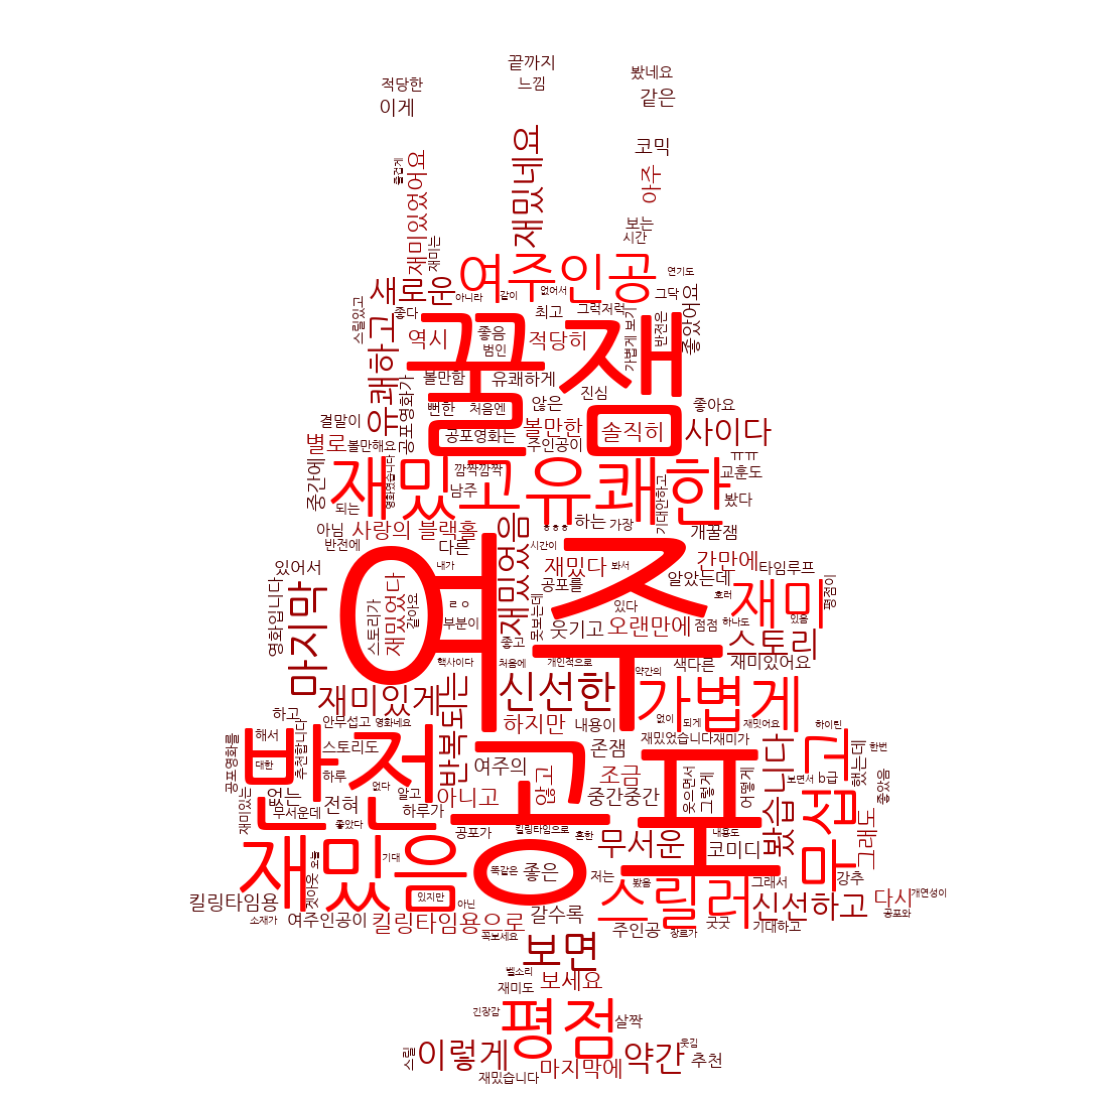

In [ ]:
displayWordCloud(' '.join(sentences))

#### noun만 뽑아내서 wordcloud 생성

In [ ]:
from soynlp.noun import LRNounExtractor

In [ ]:
noun_extractor = LRNounExtractor(verbose=True)
noun_extractor.train(sentences)
nouns = noun_extractor.extract()

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded
[Noun Extractor] scanning was done (L,R) has (3191, 2063) tokens
[Noun Extractor] building L-R graph was done
[Noun Extractor] 468 nouns are extracted


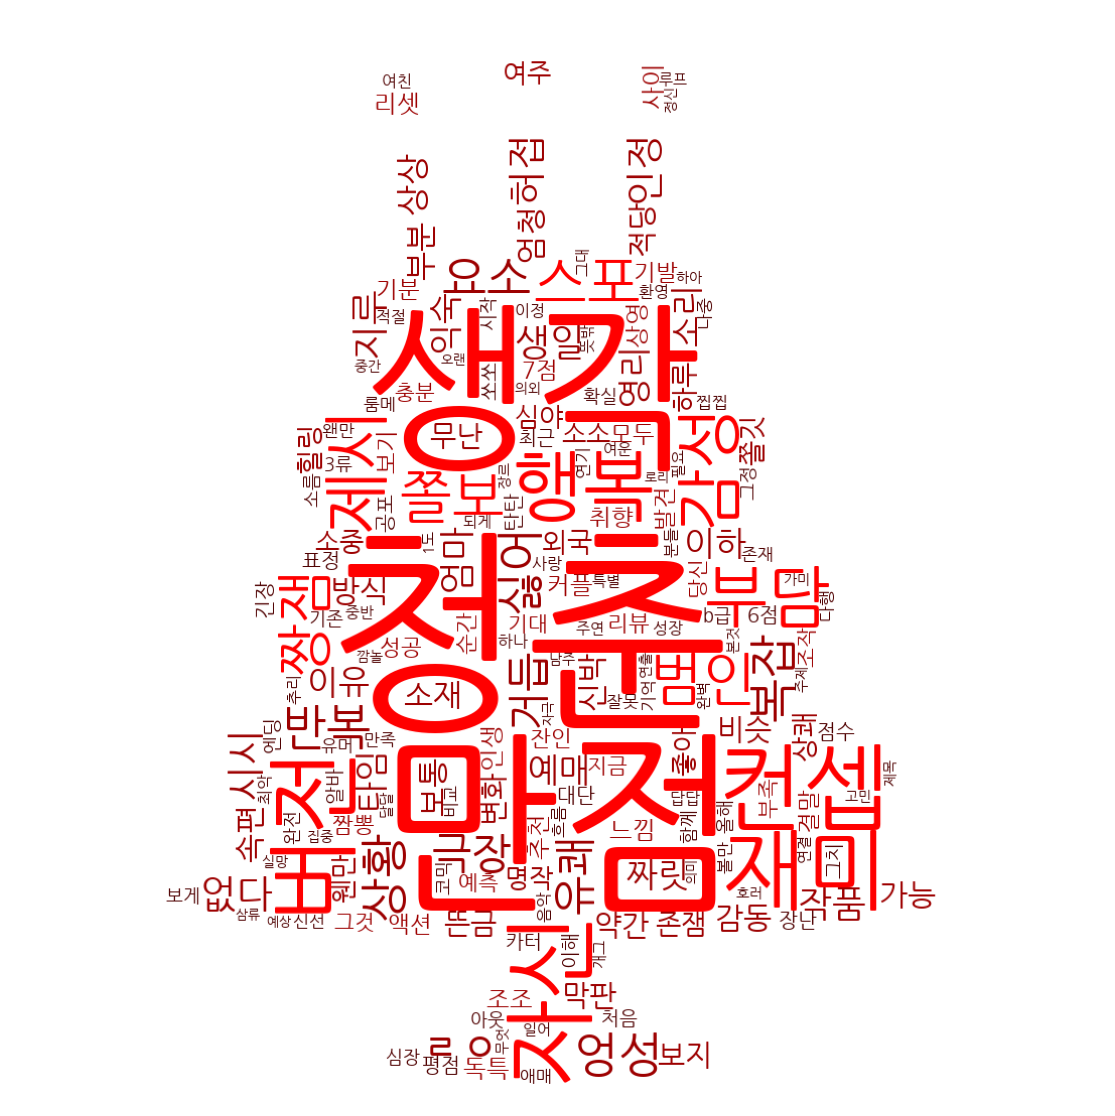

In [ ]:
displayWordCloud(' '.join(nouns))